# CLUSTERING THE MILITARY POWERS OF COUNTRIES - ÜLKELERİN ASKERİ GÜÇLERİNİN KÜMELENMESİ

In [20]:
#İmporting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
df=pd.read_excel("World military power.xlsx")

In [22]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369


In [23]:
df=pd.read_excel("World military power.xlsx", header=1)

In [24]:
df.sample(7)

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
19,Burkina Faso,1.9009,Burkina Faso,16,Burkina Faso,0,Burkina Faso,3,Burkina Faso,1,...,Burkina Faso,"1,97,42,715",Burkina Faso,"2,74,200",NaN,NaN,Burkina Faso,0,Burkina Faso,3611.0
53,Ireland,1.9481,Ireland,19,Ireland,0,Ireland,0,Ireland,0,...,Ireland,"50,68,050",Ireland,70273,Ireland,1448,Ireland,956,Ireland,443.0
13,Bhutan,10.1681,Bhutan,2,Bhutan,0,Bhutan,0,Bhutan,0,...,Bhutan,"7,66,397",Bhutan,38394,NaN,NaN,Bhutan,0,Bhutan,1136.0
46,Guatemala,1.8302,Guatemala,33,Guatemala,0,Guatemala,4,Guatemala,8,...,Guatemala,"1,65,81,273",Guatemala,"1,08,889",Guatemala,400,Guatemala,990,Guatemala,1667.0
125,Turkmenistan,1.3292,Turkmenistan,72,Turkmenistan,24,Turkmenistan,20,Turkmenistan,3,...,Turkmenistan,"54,11,012",Turkmenistan,"4,88,100",Turkmenistan,1768,Turkmenistan,1300,Turkmenistan,4158.0
60,Kenya,1.5287,Kenya,150,Kenya,17,Kenya,0,Kenya,20,...,Kenya,"4,83,97,527",Kenya,"5,80,367",Kenya,536,Kenya,0,Kenya,3457.0
81,Nepal,2.9891,Nepal,16,Nepal,0,Nepal,0,Nepal,3,...,Nepal,"2,97,17,587",Nepal,"1,47,181",NaN,NaN,Nepal,0,Nepal,3159.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

In [26]:
df.shape

(138, 60)

In [27]:
df.isnull().sum()

Military Strength                           0
Military Strength Power Index               0
Aircraft Strength                           0
Aircraft Strength value                     0
Fighter/Interceptor Strength                0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength                    0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength           0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet                      0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength                   0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength            0
Attack Helicopter Fleet Strength value      0
Tank Strength                               0
Tank Strength value                         0
AFV/APC Strength                            0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength           0
Self-Propelled Artillery Strength 

In [28]:
df.duplicated().sum() 

0

In [29]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,Airport Totals value,Total Border Coverage value
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,124.000000,115.000000,115.000000,115.000000,115.000000,138.000000,129.000000
mean,1.460716,388.471014,81.565217,25.760870,30.231884,82.833333,154.065217,25.623188,646.565217,2485.695652,212.159420,393.978261,156.934783,84.983871,0.382609,4.800000,2.052174,3.521739,290.043478,3964.224806
std,1.324018,1231.981859,230.324777,94.528222,92.330436,240.803721,520.183631,97.326091,1515.463683,5410.546392,688.028987,805.781703,484.380984,146.114165,1.971653,13.706958,10.000740,6.481211,1212.967393,3760.099671
min,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,29.000000
25%,0.574800,33.000000,0.000000,0.000000,3.000000,4.250000,15.250000,0.000000,19.250000,250.250000,0.000000,24.250000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,33.500000,1587.000000
50%,1.034100,111.000000,17.000000,0.000000,9.000000,26.000000,44.000000,2.000000,153.000000,734.500000,23.000000,108.000000,24.000000,38.000000,0.000000,0.000000,0.000000,0.000000,68.000000,2816.000000
75%,2.021525,290.250000,60.500000,15.750000,26.000000,79.250000,126.750000,17.750000,436.250000,2000.000000,97.250000,296.500000,99.750000,77.750000,0.000000,4.000000,0.000000,5.500000,150.750000,5267.000000
max,10.168100,13264.000000,2085.000000,742.000000,945.000000,2643.000000,5768.000000,967.000000,12950.000000,39253.000000,6083.000000,4465.000000,3860.000000,984.000000,20.000000,83.000000,91.000000,52.000000,13513.000000,22457.000000


In [30]:
df.corr()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,Airport Totals value,Total Border Coverage value
Military Strength Power Index,1.000000,-0.267329,-0.310888,-0.241948,-0.267104,-0.284756,-0.244545,-0.231723,-0.324300,-0.361796,-0.268935,-0.335405,-0.247800,-0.375253,-0.195382,-0.322829,-0.207112,-0.421650,-0.173362,-0.278147
Aircraft Strength value,-0.267329,1.000000,0.944492,0.860263,0.974029,0.974288,0.992802,0.964266,0.625598,0.844898,0.513687,0.566740,0.520071,0.526446,0.922611,0.668530,0.915876,0.232956,0.884260,0.431274
Fighter/Interceptor Strength value,-0.310888,0.944492,1.000000,0.878844,0.908768,0.886299,0.905858,0.922056,0.719875,0.932691,0.659839,0.696251,0.669376,0.664113,0.806006,0.802354,0.877554,0.451837,0.733474,0.508782
Attack Aircraft Strength value,-0.241948,0.860263,0.878844,1.000000,0.892666,0.762131,0.820890,0.916149,0.812318,0.871821,0.776320,0.684005,0.772270,0.631921,0.656635,0.761357,0.734484,0.323042,0.663088,0.615603
Transport Aircraft Fleet Strength value,-0.267104,0.974029,0.908768,0.892666,1.000000,0.927991,0.964244,0.948860,0.647605,0.818061,0.530161,0.576765,0.542214,0.518940,0.870717,0.649020,0.868212,0.232091,0.874719,0.523876
Trainer Aircraft Fleet value,-0.284756,0.974288,0.886299,0.762131,0.927991,1.000000,0.973744,0.909770,0.547113,0.773963,0.392221,0.495196,0.400216,0.457386,0.936417,0.576860,0.886580,0.165191,0.899261,0.337081
Helicopter Fleet Strength value,-0.244545,0.992802,0.905858,0.820890,0.964244,0.973744,1.000000,0.953013,0.568368,0.798437,0.453496,0.509179,0.448298,0.466387,0.943658,0.606240,0.911284,0.160675,0.904459,0.375196
Attack Helicopter Fleet Strength value,-0.231723,0.964266,0.922056,0.916149,0.948860,0.909770,0.953013,1.000000,0.693216,0.860358,0.640999,0.570675,0.614542,0.508812,0.855873,0.682027,0.882033,0.236247,0.812823,0.462982
Tank Strength value,-0.324300,0.625598,0.719875,0.812318,0.647605,0.547113,0.568368,0.693216,1.000000,0.778759,0.830509,0.805103,0.864147,0.686335,0.368344,0.746872,0.447492,0.325212,0.346984,0.484769
AFV/APC Strength value,-0.361796,0.844898,0.932691,0.871821,0.818061,0.773963,0.798437,0.860358,0.778759,1.000000,0.790061,0.765663,0.751266,0.689494,0.663752,0.787019,0.745806,0.498937,0.591883,0.507885


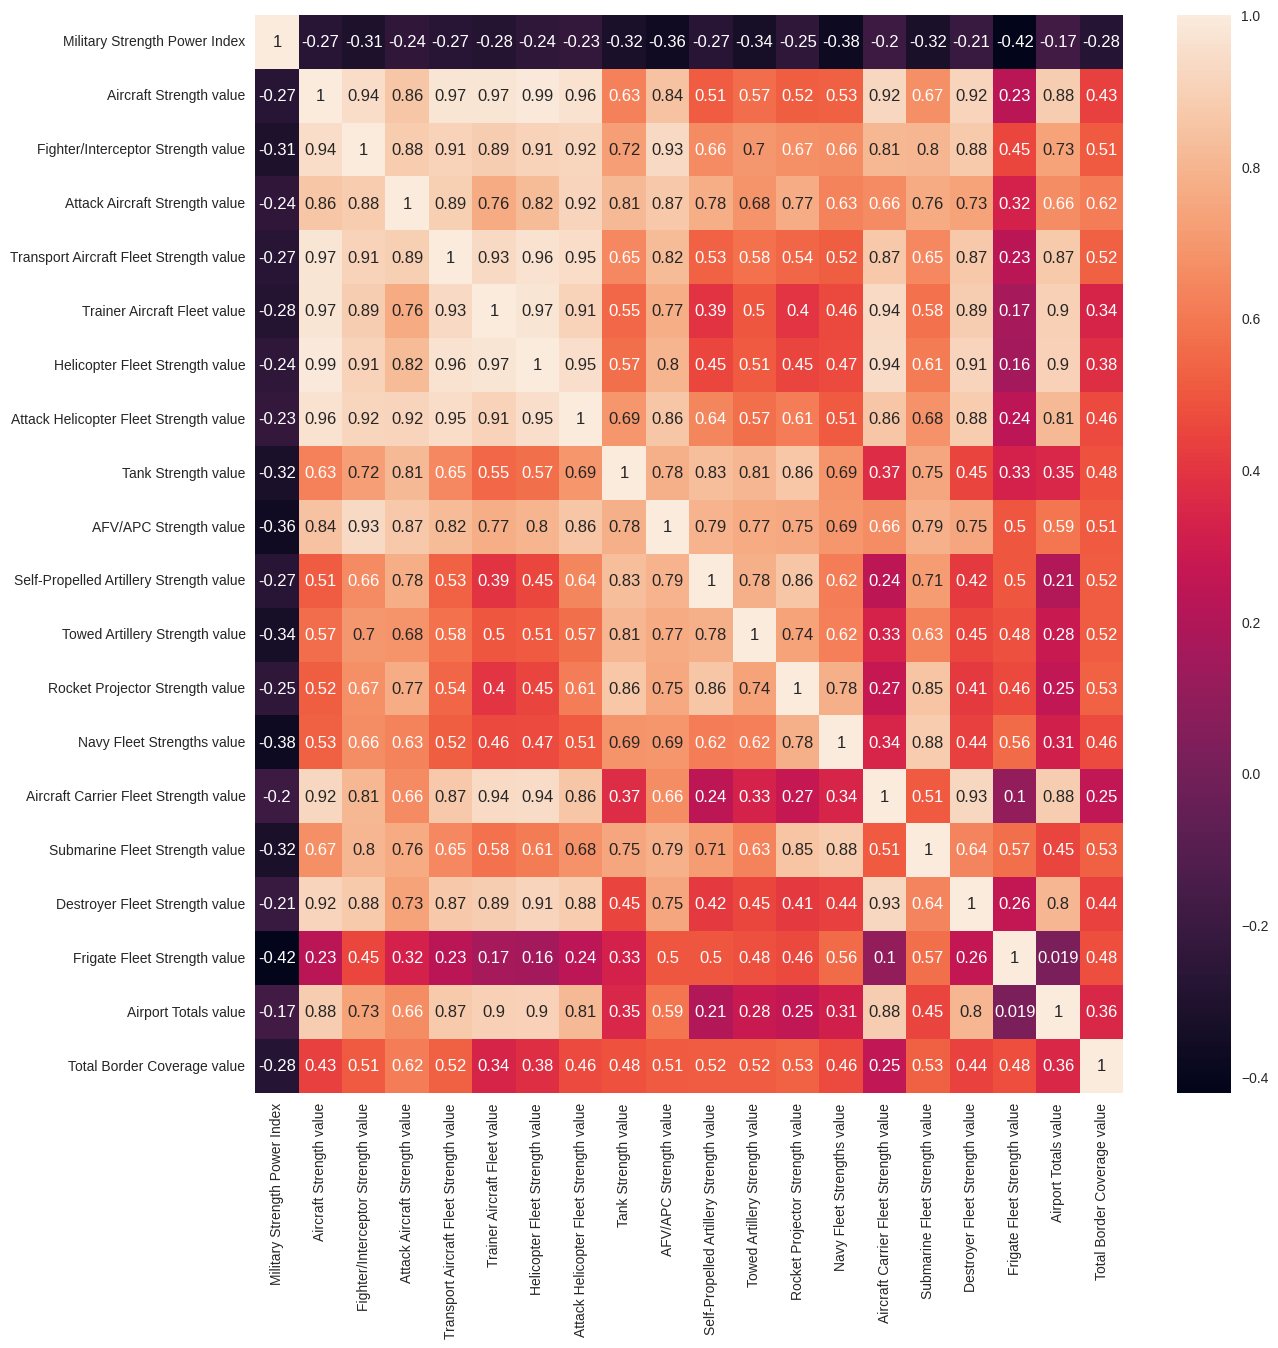

In [31]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True);

In [32]:
df.corr()["Military Strength Power Index"].sort_values(ascending=False)

Military Strength Power Index              1.000000
Airport Totals value                      -0.173362
Aircraft Carrier Fleet Strength value     -0.195382
Destroyer Fleet Strength value            -0.207112
Attack Helicopter Fleet Strength value    -0.231723
Attack Aircraft Strength value            -0.241948
Helicopter Fleet Strength value           -0.244545
Rocket Projector Strength value           -0.247800
Transport Aircraft Fleet Strength value   -0.267104
Aircraft Strength value                   -0.267329
Self-Propelled Artillery Strength value   -0.268935
Total Border Coverage value               -0.278147
Trainer Aircraft Fleet value              -0.284756
Fighter/Interceptor Strength value        -0.310888
Submarine Fleet Strength value            -0.322829
Tank Strength value                       -0.324300
Towed Artillery Strength value            -0.335405
AFV/APC Strength value                    -0.361796
Navy Fleet Strengths value                -0.375253
Frigate Flee

In [33]:
#Düzenleme

In [34]:
df.columns=df.columns.str.lower().str.replace(" ","_")

In [35]:
df.head()

,military_strength,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter/interceptor_strength,fighter/interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,...,total_population,total_population_value,total_square_land_area,total_square_land_area_value,total_coastline_coverage,total_coastline_coverage_value,total_waterway_coverage,total_waterway_coverage_value,total_border_coverage,total_border_coverage_value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


In [36]:
df.shape

(138, 60)

In [37]:
#ülke isimleri aynı olduğundan yer kaplamasın diye siliyoruz
df.drop(df.iloc[:,2:59:2], inplace=True, axis=1)

In [38]:
df.sample(5)

,military_strength,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,...,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
73,Mexico,0.6065,484,3,33,43,206,202,0,0,...,1714,"19,81,000","20,00,000","7,64,00,00,000","6,04,60,418","12,59,59,205","19,64,375",9330,2900,4389.0
68,Lithuania,1.4752,10,0,0,5,0,5,0,0,...,61,2000,72400,"1,20,00,000","17,79,322","27,93,284",65300,90,441,1545.0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,...,157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734.0
107,Slovenia,1.9496,38,0,0,3,23,16,0,44,...,16,5,55000,0,"10,02,714","21,02,126",20273,47,0,1211.0
89,Norway,0.5277,150,59,15,4,32,47,0,52,...,95,"16,18,000","2,60,000","6,61,10,00,000","21,70,365","53,72,191","3,23,802",25148,1577,2566.0


In [39]:
df.rename(columns={'military_strength':'Country'}, inplace=True)

In [40]:
df.head()

,Country,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,...,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,...,43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987.0
1,Albania,2.3137,19,0,0,0,0,19,0,0,...,4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691.0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,...,157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734.0
3,Angola,0.8379,295,72,18,30,47,126,15,379,...,176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369.0
4,Argentina,0.6521,227,24,7,9,64,100,0,370,...,1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968.0


In [41]:
df.isnull().sum()

Country                                     0
military_strength_power_index               0
aircraft_strength_value                     0
fighter/interceptor_strength_value          0
attack_aircraft_strength_value              0
transport_aircraft_fleet_strength_value     0
trainer_aircraft_fleet_value                0
helicopter_fleet_strength_value             0
attack_helicopter_fleet_strength_value      0
tank_strength_value                         0
afv/apc_strength_value                      0
self-propelled_artillery_strength_value     0
towed_artillery_strength_value              0
rocket_projector_strength_value             0
navy_fleet_strengths_value                 14
aircraft_carrier_fleet_strength_value      23
submarine_fleet_strength_value             23
destroyer_fleet_strength_value             23
frigate_fleet_strength_value               23
defense_spending_budget_value               0
external_debt_value                         0
airport_totals_value              

In [42]:
df.replace(',','', regex=True, inplace=True)

In [43]:
df.isnull().sum()

Country                                     0
military_strength_power_index               0
aircraft_strength_value                     0
fighter/interceptor_strength_value          0
attack_aircraft_strength_value              0
transport_aircraft_fleet_strength_value     0
trainer_aircraft_fleet_value                0
helicopter_fleet_strength_value             0
attack_helicopter_fleet_strength_value      0
tank_strength_value                         0
afv/apc_strength_value                      0
self-propelled_artillery_strength_value     0
towed_artillery_strength_value              0
rocket_projector_strength_value             0
navy_fleet_strengths_value                 14
aircraft_carrier_fleet_strength_value      23
submarine_fleet_strength_value             23
destroyer_fleet_strength_value             23
frigate_fleet_strength_value               23
defense_spending_budget_value               0
external_debt_value                         0
airport_totals_value              

In [44]:
#dfi=df.loc[:, df.columns != 'Country'].astype('int64')

In [45]:
#country=df['Country']

In [46]:
#dfi['Country']=country

In [47]:
#dfi.head()

In [48]:
columns = df.select_dtypes("object").columns
columns

Index(['Country', 'defense_spending_budget_value', 'external_debt_value',
       'oil_production_value', 'oil_consumption_value',
       'proven_oil_reserves_value', 'available_manpower_value',
       'total_population_value', 'total_square_land_area_value',
       'total_coastline_coverage_value', 'total_waterway_coverage_value'],
      dtype='object')

In [49]:
for col in columns[1:]:
    df[col]  = df[col].astype("str")
    df[col]  = df.select_dtypes("object")[col].str.replace(',','')
    df[col]  = df[col].astype("float")

In [50]:
df.fillna(0, inplace=True)

In [51]:
#Modelleme

In [52]:
x=df.drop(['Country'],axis=1)
#x=pd.get_dummies(x,drop_first=True)

In [53]:
x.head()

,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,...,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
0,1.3444,260,0,25,30,0,187,0,0,1062,...,43,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
1,2.3137,19,0,0,0,0,19,0,0,467,...,4,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
2,0.4659,551,103,22,59,87,257,45,880,7361,...,157,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
3,0.8379,295,72,18,30,47,126,15,379,595,...,176,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
4,0.6521,227,24,7,9,64,100,0,370,739,...,1138,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0


In [54]:
model=KMeans(n_clusters=4) 

In [55]:
tahmin=model.fit(x)

In [56]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength_power_index            138 non-null    float64
 1   aircraft_strength_value                  138 non-null    int64  
 2   fighter/interceptor_strength_value       138 non-null    int64  
 3   attack_aircraft_strength_value           138 non-null    int64  
 4   transport_aircraft_fleet_strength_value  138 non-null    int64  
 5   trainer_aircraft_fleet_value             138 non-null    int64  
 6   helicopter_fleet_strength_value          138 non-null    int64  
 7   attack_helicopter_fleet_strength_value   138 non-null    int64  
 8   tank_strength_value                      138 non-null    int64  
 9   afv/apc_strength_value                   138 non-null    int64  
 10  self-propelled_artillery_strength_value  138 non-n

In [57]:
x.isnull().sum()

military_strength_power_index              0
aircraft_strength_value                    0
fighter/interceptor_strength_value         0
attack_aircraft_strength_value             0
transport_aircraft_fleet_strength_value    0
trainer_aircraft_fleet_value               0
helicopter_fleet_strength_value            0
attack_helicopter_fleet_strength_value     0
tank_strength_value                        0
afv/apc_strength_value                     0
self-propelled_artillery_strength_value    0
towed_artillery_strength_value             0
rocket_projector_strength_value            0
navy_fleet_strengths_value                 0
aircraft_carrier_fleet_strength_value      0
submarine_fleet_strength_value             0
destroyer_fleet_strength_value             0
frigate_fleet_strength_value               0
defense_spending_budget_value              0
external_debt_value                        0
airport_totals_value                       0
oil_production_value                       0
oil_consum

In [58]:
x.head()

,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,...,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
0,1.3444,260,0,25,30,0,187,0,0,1062,...,43,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
1,2.3137,19,0,0,0,0,19,0,0,467,...,4,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
2,0.4659,551,103,22,59,87,257,45,880,7361,...,157,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
3,0.8379,295,72,18,30,47,126,15,379,595,...,176,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
4,0.6521,227,24,7,9,64,100,0,370,739,...,1138,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0


In [59]:
tahmin=model.predict(x)

In [60]:
tahmin

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [61]:
x["cluster"]=tahmin

In [62]:
silhouette_score(x,tahmin)

0.8671436271439987

In [63]:
allscore=[]
allclusters=[]
uzakliklar=[]
def clust(kactane):
    
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklik=model.inertia_
        print("Cluster",i,"score",score)
        allscore.append(score)
        allclusters.append(i)
        uzakliklar.append(uzaklik)
clust(10)

Cluster 2 score 0.9227153206136329
Cluster 3 score 0.8995442950361631
Cluster 4 score 0.8671436271439987
Cluster 5 score 0.8675195540746111
Cluster 6 score 0.7789462745536555
Cluster 7 score 0.7817947546427708
Cluster 8 score 0.7847423623940264
Cluster 9 score 0.6833747949746692
Cluster 10 score 0.6795886784648338
Cluster 11 score 0.6793362279710159


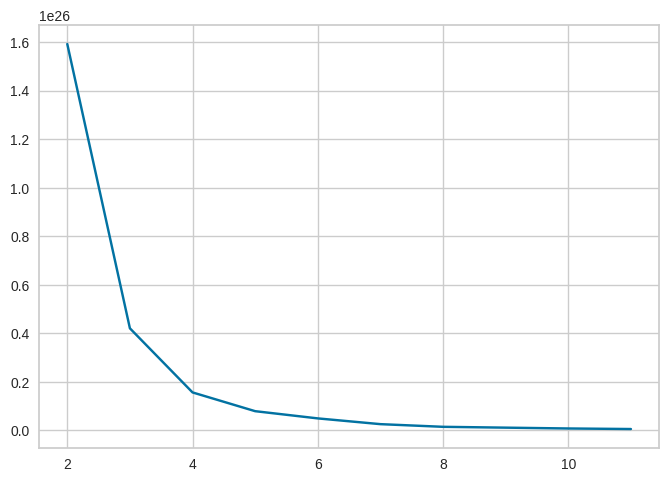

In [68]:
plt.plot(allclusters,uzakliklar);

In [69]:
from yellowbrick.cluster import KElbowVisualizer

In [70]:
model=KMeans()

In [71]:
visualizer=KElbowVisualizer(model,k=(2,10))

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

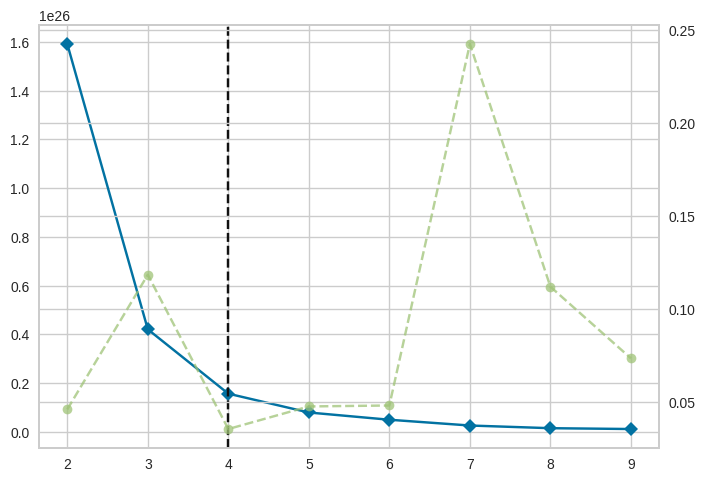

In [72]:
visualizer.fit(x)

In [73]:
visualizer.show()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<Axes: xlabel='military_strength_power_index', ylabel='Country'>

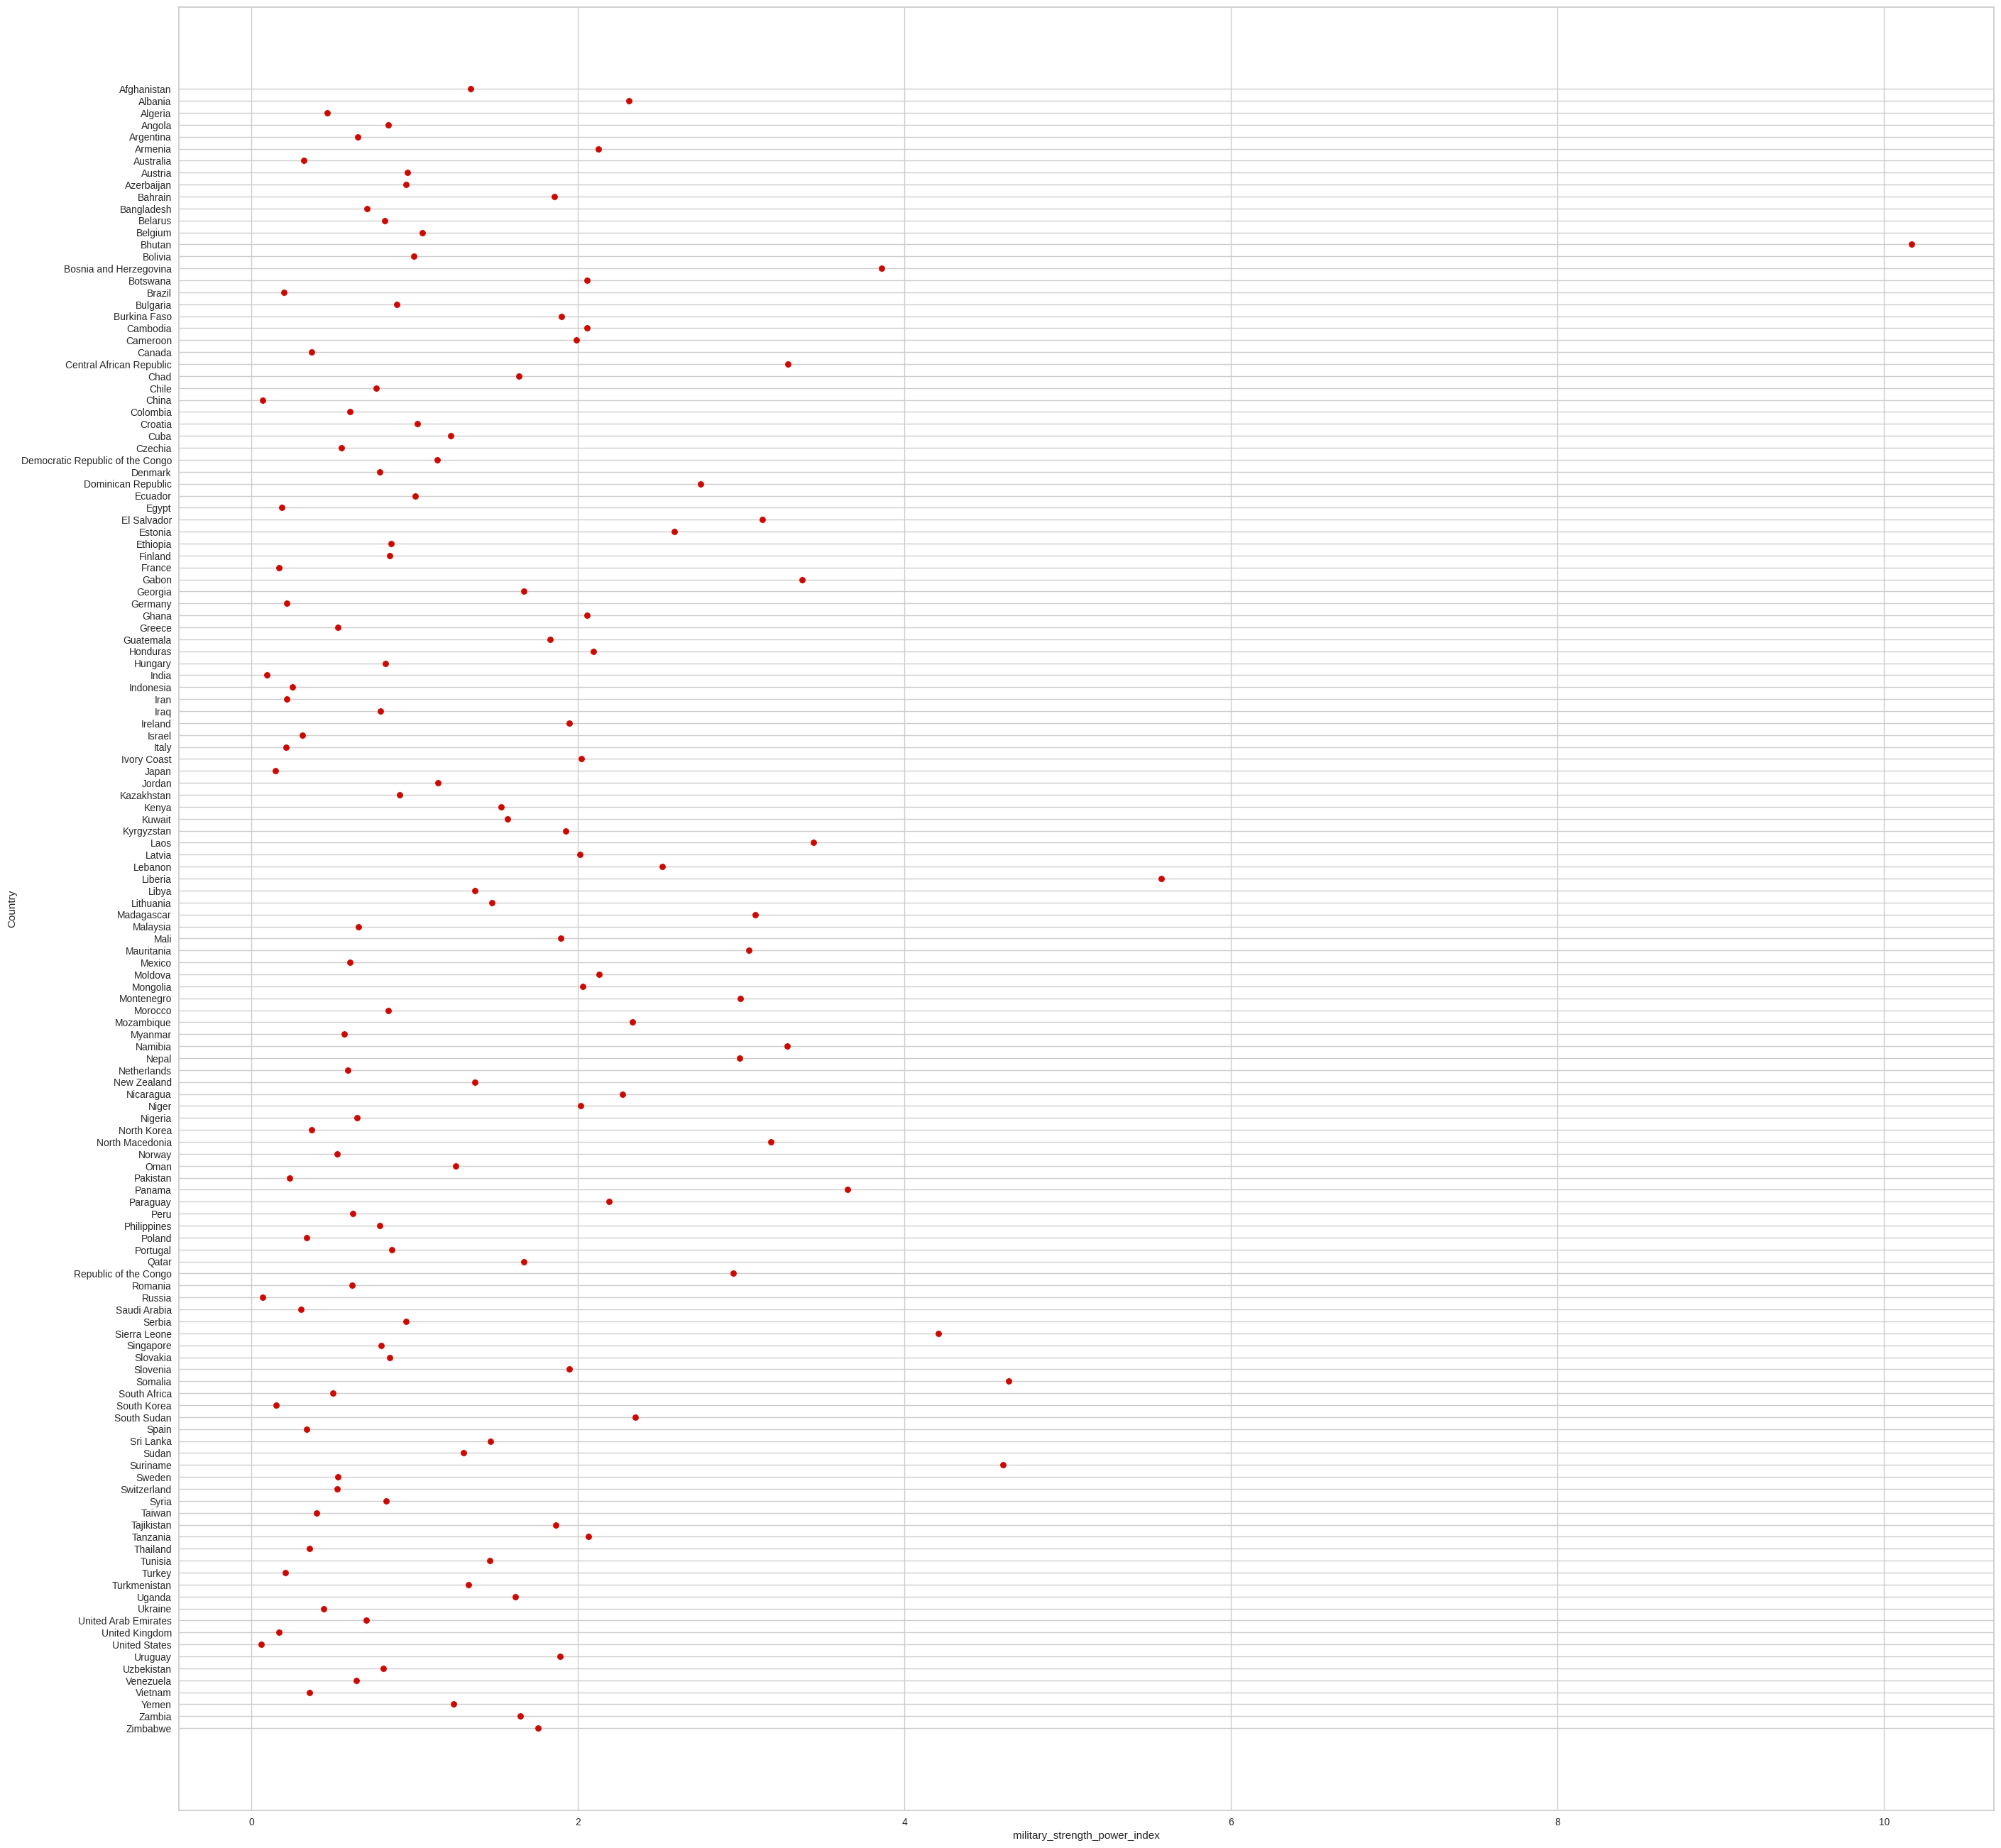

In [75]:
fig, ax = plt.subplots(figsize=(33,33)) 
sns.scatterplot(x='military_strength_power_index',y='Country',data=df,color='r')

In [76]:
#Clusterları isimlendirip, görselleştiriyoruz

In [77]:
d={1:"Az gelismis",2:"cok gelismis",3:"gelismis",0:"orta gelismis"}
x['gelismis']=x.cluster.map(d)

In [78]:
plt.figure(figsize=(10,20))
sns.scatterplot(x["military_strength_power_index"], 
                df["Country"], hue= x.gelismis,palette= "viridis");

TypeError: ignored

<Figure size 1000x2000 with 0 Axes>

'C:\\Users\\LENOVO\\Desktop\\AI Bedia\\Project Based Learning Level-1\\10-Clustering The Military Powers of Countiries'